<a href="https://colab.research.google.com/github/AnusreeMandal/SoftComputing_Lab/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Anusree Mandal

Enrolment No: 2022CSB016

Neural Network using Backpropagation on 7-Segment Display

1. Implement backpropagation (BP) on feedforward perceptron neural network with 2 hidden layers for recognizing digits 0-9, assuming 7-segment display as input and outputs 1 when K (0...9) is input, else outputs 0.
Use Sigmoidal activation function and MSE as loss function.
See the input patterns below.

(i) Examine effect of learning rate, hidden layers and nodes in each hidden layer.

(ii) Study convergence by plotting loss vs. iterations.

(iii) Perform N-fold cross validation for evaluating performance metrics (Accuracy,
Specificity, Sensitivity, Precession, Recall, and F-Measure)

In [ ]:
import numpy as np

In [ ]:
num_patterns = np.array([
[1, 1, 1, 1, 1, 1, 0], # 0
[0, 1, 1, 0, 0, 0, 0], # 1
[1, 1, 0, 1, 1, 0, 1], # 2
[1, 1, 1, 1, 0, 0, 1], # 3
[0, 1, 1, 0, 0, 1, 1], # 4
[1, 0, 1, 1, 0, 1, 1], # 5
[1, 0, 1, 1, 1, 1, 1], # 6
[1, 1, 1, 0, 0, 0, 0], # 7
[1, 1, 1, 1, 1, 1, 1], # 8
[1, 1, 1, 1, 0, 1, 1] # 9
])

In [ ]:
x = np.array([[int(x) for x in np.binary_repr(i, width=7)] for i in range(128)])
x

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0,

In [ ]:
y = np.array([[1] if any(np.array_equal(i, pattern) for pattern in num_patterns) else [0] for i in x])

In [ ]:
data=np.concatenate((x,y),axis=1)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
valid=data[data[:,-1]==1]
invalid=data[data[:,-1]==0]

In [ ]:
from sklearn.utils import resample
valid_oversampled=resample(valid,replace=True,n_samples=len(invalid),random_state=42)
data=np.concatenate((valid_oversampled,invalid),axis=0)
np.random.shuffle(data)

In [ ]:
x=data[:,:-1]
y=data[:,-1].reshape(-1,1)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return x*(1-x)

def mse(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

In [ ]:
# neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size,learning_rate):
        self.learning_rate=learning_rate
        self.weights1=np.random.rand(input_size,hidden_size1)-0.5
        self.weights2=np.random.rand(hidden_size1,hidden_size2)-0.5
        self.weights3=np.random.rand(hidden_size2,output_size)-0.5
        self.bias1=np.random.rand(1,hidden_size1)-0.5
        self.bias2=np.random.rand(1,hidden_size2)-0.5
        self.bias3=np.random.rand(1,output_size)-0.5

    def forward_propagation(self,x):
        self.input=x
        self.hidden1=sigmoid(np.dot(self.input,self.weights1)+self.bias1)
        self.hidden2=sigmoid(np.dot(self.hidden1,self.weights2)+self.bias2)
        self.output=sigmoid(np.dot(self.hidden2,self.weights3)+self.bias3)
        return self.output

    def backward_propagation(self,y_true):
        error=y_true-self.output
        d_output=error*sigmoid_derivative(self.output)
        error_hidden2=d_output.dot(self.weights3.T)
        d_hidden2=error_hidden2*sigmoid_derivative(self.hidden2)
        error_hidden1=d_hidden2.dot(self.weights2.T)
        d_hidden1=error_hidden1*sigmoid_derivative(self.hidden1)
        #updating weights and bias
        self.weights3+=self.hidden2.T.dot(d_output)*self.learning_rate
        self.weights2+=self.hidden1.T.dot(d_hidden2)*self.learning_rate
        self.weights1+=self.input.T.dot(d_hidden1)*self.learning_rate
        self.bias3+=np.sum(d_output,axis=0,keepdims=True)*self.learning_rate
        self.bias2+=np.sum(d_hidden2,axis=0,keepdims=True)*self.learning_rate
        self.bias1+=np.sum(d_hidden1,axis=0,keepdims=True)*self.learning_rate

    def train(self,x,y,epochs):
        loss=[]
        for i in range(epochs):
            output=self.forward_propagation(x)
            loss_value=mse(y,output)
            loss.append(loss_value)
            loss.append(loss_value)
            self.backward_propagation(y)
            if (i+1)%100==0:
                print(f"Epoch {i+1}: Loss={loss_value}")
        return loss

    def predict(self,x):
        pred=self.forward_propagation(x)
        return np.round(pred).astype(int)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
def stratified_crossvalidation(x,y,hidden1_size,hidden2_size,learning_rate,epochs,n_splits):
  skf=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]
  specificity=[]
  confusionmatrix=np.zeros((2,2),dtype=int)
  i=0
  for train_index,test_index in skf.split(x,y):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    nn=NeuralNetwork(x.shape[1],hidden1_size,hidden2_size,1,learning_rate)
    nn.train(x_train,y_train,epochs)
    y_pred=nn.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    specificity.append(tn/(tn+fp) if tn+fp>0 else 0)
    confusionmatrix[0,0]+=tn
    confusionmatrix[0,1]+=fp
    confusionmatrix[1,0]+=fn
    confusionmatrix[1,1]+=tp
    i+=1
    print(f"\nFold {i}:")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"Precision: {precision_score(y_test,y_pred)}")
    print(f"Recall: {recall_score(y_test,y_pred)}")
    print(f"F1 Score: {f1_score(y_test,y_pred)}")
    print(f"Specificity: {tn/(tn+fp) if tn+fp>0 else 0}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="Blues",cbar=False,
  xticklabels=["Predicted 0", "Predicted 1"],yticklabels=["Actual 0", "Actual 1"])
  plt.title("Final Confusion Matrix (Summed over all folds)")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print(f"\nAverage accuracy across all folds:{np.mean(accuracy)}")
  print(f"Average precision across all folds:{np.mean(precision)}")
  print(f"Average recall across all folds:{np.mean(recall)}")
  print(f"Average f1 score across all folds:{np.mean(f1)}")
  print(f"Average specificity across all folds:{np.mean(specificity)}")

Epoch 100: Loss=0.1854396661220548
Epoch 200: Loss=0.1324476282983588
Epoch 300: Loss=0.12192286233917478
Epoch 400: Loss=0.11758766264149788
Epoch 500: Loss=0.11443988402243938
Epoch 600: Loss=0.11119093684839558
Epoch 700: Loss=0.10717046316224241
Epoch 800: Loss=0.10181154267028515
Epoch 900: Loss=0.0945793434360419
Epoch 1000: Loss=0.08502652449131447


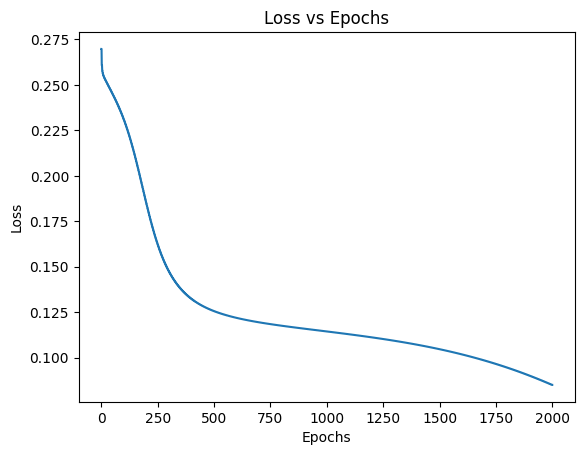

In [ ]:
neural_network_num=NeuralNetwork(x.shape[1],16,32,1,0.01)
loss=neural_network_num.train(x,y,1000)
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

Epoch 100: Loss=0.2181114124045615
Epoch 200: Loss=0.14475073931098772
Epoch 300: Loss=0.12022258963695553
Epoch 400: Loss=0.1126964200071745
Epoch 500: Loss=0.10857335367264155
Epoch 600: Loss=0.10500568081500658
Epoch 700: Loss=0.10099323617752178
Epoch 800: Loss=0.09610633385481153
Epoch 900: Loss=0.09017986232320309
Epoch 1000: Loss=0.08314393468151583

Fold 1:
Accuracy: 0.7708333333333334
Precision: 0.7407407407407407
Recall: 0.8333333333333334
F1 Score: 0.7843137254901961
Specificity: 0.7083333333333334
Confusion Matrix:
[[17  7]
 [ 4 20]]
Epoch 100: Loss=0.21224975712606045
Epoch 200: Loss=0.13365025188213234
Epoch 300: Loss=0.11099660437320547
Epoch 400: Loss=0.1036335653391559
Epoch 500: Loss=0.09959926276869747
Epoch 600: Loss=0.09638889821376029
Epoch 700: Loss=0.09314020770690952
Epoch 800: Loss=0.08934023252775505
Epoch 900: Loss=0.08452032719284071
Epoch 1000: Loss=0.07837820504687715

Fold 2:
Accuracy: 0.7872340425531915
Precision: 0.696969696969697
Recall: 1.0
F1 Score:

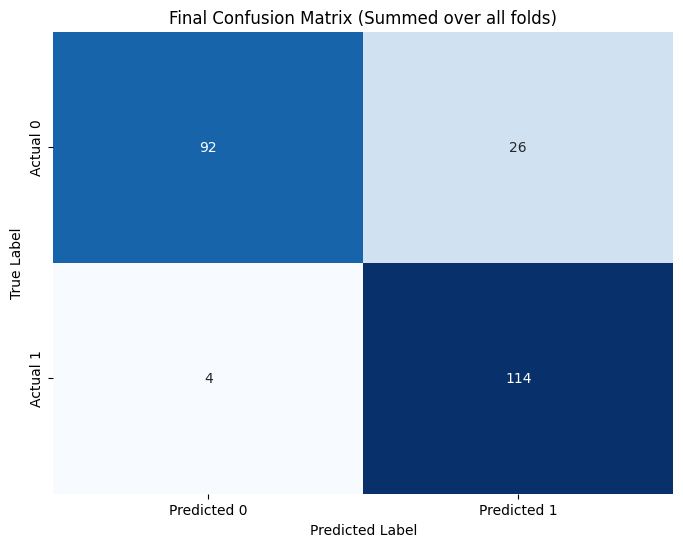


Average accuracy across all folds:0.8733156028368795
Average precision across all folds:0.8227781618126446
Average recall across all folds:0.9666666666666668
Average f1 score across all folds:0.8859899036537693
Average specificity across all folds:0.7822463768115943


In [ ]:
stratified_crossvalidation(x,y,16,32,0.01,1000,5)

Repeat the problem for A-Z Handwritten Alphabets using 5×5 grid structure. Use
multiple patterns for each handwritten alphabet.

In [ ]:
character_grids = {
    "A": [[0, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1]],
    "B": [[1, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0]],
    "C": [[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 1]],
    "D": [[1, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0]],
    "E": [[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 0],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 1]],
    "F": [[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0]],
    "G": [[0, 1, 1, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 0, 1, 1, 1],
          [1, 0, 0, 0, 1],
          [0, 1, 1, 1, 1]],
    "H": [[1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1]],
    "I": [[1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [1, 1, 1, 1, 1]],
    "J": [[1, 1, 1, 1, 1],
          [0, 0, 0, 0, 1],
          [0, 1, 0, 0, 1],
          [0, 1, 0, 0, 1],
          [0, 1, 1, 1, 0]],
    "K": [[1, 0, 0, 1, 0],
          [1, 0, 1, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 0, 1, 0, 0],
          [1, 0, 0, 1, 0]],
    "L": [[1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 1]],
    "M": [[1, 0, 0, 0, 1],
          [1, 1, 0, 1, 1],
          [1, 0, 1, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1]],
    "N": [[1, 0, 0, 0, 1],
          [1, 1, 0, 0, 1],
          [1, 0, 1, 0, 1],
          [1, 0, 0, 1, 1],
          [1, 0, 0, 0, 1]],
    "O": [[0, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [0, 1, 1, 1, 0]],
    "P": [[1, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 0, 0]],
    "Q": [[0, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 1, 1, 0],
          [0, 1, 1, 1, 1]],
    "R": [[1, 1, 1, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0],
          [1, 0, 1, 0, 0],
          [1, 0, 0, 1, 0]],
    "S": [[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 0],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 1],
          [1, 1, 1, 1, 1]],
    "T": [[1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0]],
    "U": [[1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [0, 1, 1, 1, 0]],
    "V": [[1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [0, 1, 0, 1, 0],
          [0, 0, 1, 0, 0]],
    "W": [[1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 1, 0, 1],
          [1, 1, 0, 1, 1],
          [1, 0, 0, 0, 1]],
    "X": [[1, 0, 0, 0, 1],
          [0, 1, 0, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 1, 0, 1, 0],
          [1, 0, 0, 0, 1]],
    "Y": [[1, 0, 0, 0, 1],
          [0, 1, 0, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0]],
    "Z": [[1, 1, 1, 1, 1],
          [0, 0, 0, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 1, 0, 0, 0],
          [1, 1, 1, 1, 1]]
}

In [ ]:
def print_letter(letter):
  grid=character_grids.get(letter.upper())
  if grid:
    for row in grid:
      print("".join(["*" if cell else " " for cell in row]))
  else:
    print("Invalid letter")

In [ ]:
alphabet_pattern=np.array(list(character_grids.values()))

In [ ]:
alphabet_pattern

array([[[0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1]],

       [[1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0]],

       [[1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0]],

       [[1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]],

       [[0, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 1]],

       [[1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1,

In [ ]:
x= np.array([np.array(pattern).flatten() for pattern in alphabet_pattern])
y= np.ones(len(x))

In [ ]:
randomx=np.random.randint(0,2,(100,25))
randomy=np.zeros(100)
x=np.concatenate((x,randomx))
y=np.concatenate((y,randomy))

In [ ]:
data=np.concatenate((x,y.reshape(-1,1)),axis=1)
data

array([[0., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
valid=data[data[:,-1]==1]
invalid=data[data[:,-1]==0]

In [ ]:
valid_oversampled=resample(valid,replace=True,n_samples=len(invalid),random_state=42)
data=np.concatenate((valid_oversampled,invalid),axis=0)
np.random.shuffle(data)

In [ ]:
x=data[:,:-1]
y=data[:,-1].reshape(-1,1)

Epoch 100: Loss=0.24008936320109553
Epoch 200: Loss=0.23347855492683428
Epoch 300: Loss=0.22506827532730156
Epoch 400: Loss=0.21409546950520436
Epoch 500: Loss=0.2000462122494567
Epoch 600: Loss=0.1831495680320944
Epoch 700: Loss=0.1647405135042822
Epoch 800: Loss=0.14680210443632608
Epoch 900: Loss=0.13086074612689091
Epoch 1000: Loss=0.11743758679522635


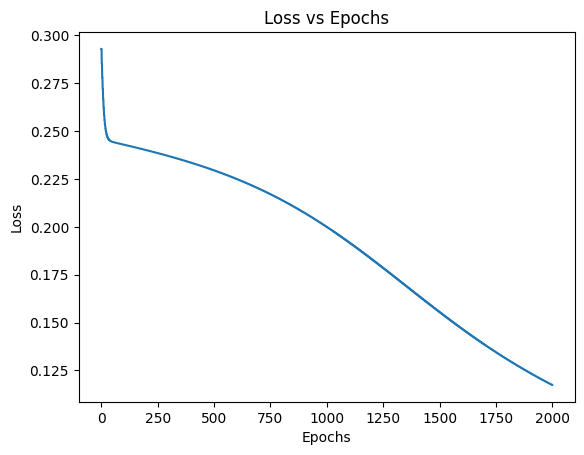

In [ ]:
neural_network_alphabet=NeuralNetwork(x.shape[1],16,32,1,0.001)
loss=neural_network_alphabet.train(x,y,1000)
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

Epoch 100: Loss=0.2519199472867089
Epoch 200: Loss=0.24891272178181714
Epoch 300: Loss=0.24586591235919344
Epoch 400: Loss=0.24252855700635695
Epoch 500: Loss=0.23863156702329227
Epoch 600: Loss=0.23386415133527244
Epoch 700: Loss=0.2278629216154599
Epoch 800: Loss=0.2202286368306785
Epoch 900: Loss=0.2105996652865513
Epoch 1000: Loss=0.19881465655024386

Fold 1:
Accuracy: 0.75
Precision: 0.7777777777777778
Recall: 0.7
F1 Score: 0.7368421052631579
Specificity: 0.8
Confusion Matrix:
[[16  4]
 [ 6 14]]
Epoch 100: Loss=0.24699706850166714
Epoch 200: Loss=0.24414573173141457
Epoch 300: Loss=0.24083269016378947
Epoch 400: Loss=0.23677187254585014
Epoch 500: Loss=0.23161200204678897
Epoch 600: Loss=0.22492596523494557
Epoch 700: Loss=0.2162356328112089
Epoch 800: Loss=0.20511167934931374
Epoch 900: Loss=0.19138636492037348
Epoch 1000: Loss=0.17544199508625008

Fold 2:
Accuracy: 0.85
Precision: 0.8181818181818182
Recall: 0.9
F1 Score: 0.8571428571428571
Specificity: 0.8
Confusion Matrix:
[[16

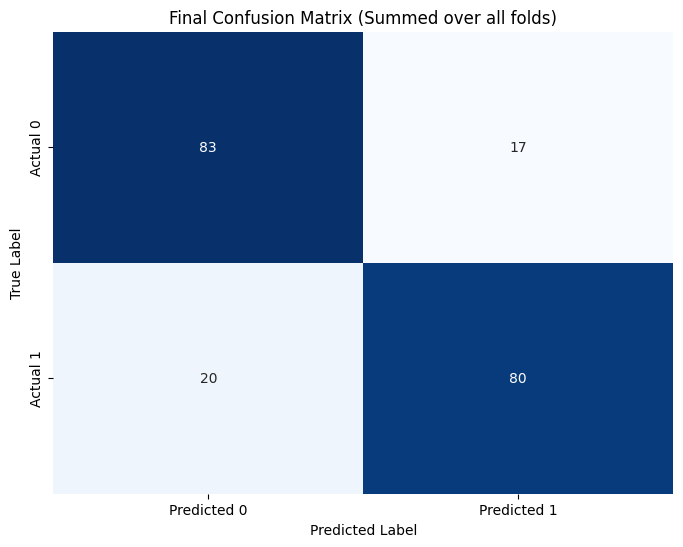


Average accuracy across all folds:0.8150000000000001
Average precision across all folds:0.8296584263689526
Average recall across all folds:0.8
Average f1 score across all folds:0.8114709851551956
Average specificity across all folds:0.8300000000000001


In [ ]:
stratified_crossvalidation(x,y,16,32,0.001,1000,5)